# Objectives

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

In [72]:
import datetime as dt
import json
import numpy as np
import pandas as pd
import re
import requests
import tweepy
import time

## Data Gathering

##  1- Twitter Archive file

In [89]:
#Read twitter archive file into dataframe
df_twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.shape

(2356, 17)

In [90]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## 2- Image prediction Data

In [91]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
# two options to read the image prediciton file

# # Option 1: using pandas.read_cvs
df_image_predictions_option1=pd.read_csv(url,sep='\t')

#option 2, as suggested by project, using requests library
r = requests.get(url)
open('image_predictions.tsv', 'wb').write(r.content)
df_image_predictions_option2 = pd.read_csv('image_predictions.tsv', sep = '\t')

# #compare both methods
result =df_image_predictions_option1.equals(df_image_predictions_option2)
print(result)

# #conclusion: use easier method option1
df_image_predictions=pd.read_csv(url,sep='\t')
df_image_predictions.head()

True


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 3- tweepy API additional data

In [92]:
consumer_key = '####'
consumer_secret = '####'
access_token = '####'
access_secret = '####'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [93]:
# list of tweet ids from archive file
tweet_ids = df_twitter_archive['tweet_id'].tolist()

In [94]:
tweet_ids[0]

892420643555336193

In [98]:
df_tweets=[]
# Quick test for calling tweepy API to ensure thing are working fine for complete list 
tweet = api.get_status(tweet_ids[0], tweet_mode= 'extended')

# number of retweets
retweets=tweet.retweet_count

# number of favorites for the tweet
favorites=tweet.favorite_count

# number of followers
user_followers=tweet.user.followers_count

# number of favourites
user_fovorites=tweet.user.favourites_count

# timestamp tweet created
date_time= tweet.created_at


df_tweets.append({'tweet_id': tweet_ids[0],
                'favorites': favorites,
                'retweets': retweets,
                'user_followers': user_followers,
                'user_favourites': user_fovorites,
                'date_time': pd.to_datetime(date_time)})
    
df_tweets

[{'tweet_id': 892420643555336193,
  'favorites': 36323,
  'retweets': 7728,
  'user_followers': 8769713,
  'user_favourites': 145944,
  'date_time': Timestamp('2017-08-01 16:23:56')}]

In [99]:
# creating a list for tweets with exceptions/errors 
tweets_error_list = []

# List of tweets
df_tweets = []

# start time of execution
start = time.time()

# For loop which will add each available tweet json to df_list
for tweet_id in tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')

        # number of retweets
        retweets=tweet.retweet_count

        # number of favorites for the tweet
        favorites=tweet.favorite_count

        # number of followers
        user_followers=tweet.user.followers_count

        # number of favourites
        user_fovorites=tweet.user.favourites_count

        # timestamp tweet created
        date_time= tweet.created_at
    
        df_tweets.append({'tweet_id': tweet_id,
                        'favorites': favorites,
                        'retweets': retweets,
                        'user_followers': user_followers,
                        'user_favourites': user_fovorites,
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweets_error_list.append(tweet_id)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

Rate limit reached. Sleeping for: 314


754011816964026368 _ [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 627


In [100]:
len(df_tweets)+len(tweets_error_list)

2356

In [101]:
df_tweets_data=pd.DataFrame(df_tweets)
df_tweets_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36323,7728,8769713,145944,2017-08-01 16:23:56
1,892177421306343426,31308,5721,8769713,145944,2017-08-01 00:17:27
2,891815181378084864,23583,3786,8769713,145944,2017-07-31 00:18:03
3,891689557279858688,39632,7892,8769713,145944,2017-07-30 15:58:51
4,891327558926688256,37832,8512,8769713,145944,2017-07-29 16:00:24


In [353]:
df_tweets_data['user_followers'].value_counts()

8769723    483
8769727    479
8769714    257
8769724    238
8769716    210
8769713    165
8769721    161
8769715    136
8769717     95
8769728     46
8769726     31
8769722      6
8770381      4
8770377      4
8770375      4
8770370      3
8770368      2
8770378      2
8770369      2
8770371      2
8769712      1
Name: user_followers, dtype: int64

In [102]:
df_tweets_data.to_csv('tweets_details.csv', index=False)

In [103]:
df_tweets_error=pd.DataFrame(tweets_error_list)

In [104]:
df_tweets_error.to_csv('tweets_errors.csv', index=False)

In [112]:
df_twitter_archive.shape, df_image_predictions.shape,df_tweets_data.shape

((2356, 17), (2075, 12), (2331, 6))

In [113]:
df_tweets_data.head(3)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36323,7728,8769713,145944,2017-08-01 16:23:56
1,892177421306343426,31308,5721,8769713,145944,2017-08-01 00:17:27
2,891815181378084864,23583,3786,8769713,145944,2017-07-31 00:18:03


In [9]:
df_tweets_errors.tail(2)

,0
23,754011816964026368
24,680055455951884288


In [10]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Step 2- Assess Data

##### Starting with three data files
1- df_twitter_archive
<br>
2- df_image_predictions
<br>
3- df_tweets_data

### 1- df_twitter_archive assessment

In [118]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [119]:
df_twitter_archive['retweeted_status_user_id'].sort_values(ascending=False)

130     7.874618e+17
195     7.475543e+17
302     7.124572e+17
2259    4.296832e+09
2260    4.296832e+09
            ...     
2351             NaN
2352             NaN
2353             NaN
2354             NaN
2355             NaN
Name: retweeted_status_user_id, Length: 2356, dtype: float64

In [120]:
df_twitter_archive['retweeted_status_id'].sort_values(ascending=False)

19      8.874740e+17
32      8.860537e+17
73      8.782815e+17
68      8.780576e+17
78      8.768508e+17
            ...     
2351             NaN
2352             NaN
2353             NaN
2354             NaN
2355             NaN
Name: retweeted_status_id, Length: 2356, dtype: float64

In [121]:
df_twitter_archive[df_twitter_archive['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [122]:
df_twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1686,681610798867845120,NaN,NaN,2015-12-28 23:00:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*collapses* 12/10 https://t.co/C7M8mnzHIK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681610798...,12,10,None,None,None,None,None
935,753398408988139520,NaN,NaN,2016-07-14 01:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. Her batteries are low. 12/10 pr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753398408...,12,10,Scout,None,None,None,None
987,749036806121881602,NaN,NaN,2016-07-02 00:27:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dietrich. He hops at random. Other dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749036806...,8,10,Dietrich,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
395,825535076884762624,NaN,NaN,2017-01-29 02:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825535076...,14,10,None,None,None,None,puppo
1330,705786532653883392,7.032559e+17,4.196984e+09,2016-03-04 16:06:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Seriously, add us 🐶 11/10 for sad wet pupper h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/705786532...,11,10,None,None,None,pupper,None
1874,675135153782571009,NaN,NaN,2015-12-11 02:08:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He got locked outside. Damn it...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675135153...,5,10,Steven,None,None,None,None
1235,712668654853337088,NaN,NaN,2016-03-23 15:53:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sunny and Roxy. They pull things ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712668654...,10,10,Sunny,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None


In [123]:
df_twitter_archive['tweet_id'].duplicated().sum()

0

In [124]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [125]:
df_twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [126]:
df_twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [127]:
df_twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [128]:
df_twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [129]:
df_twitter_archive[df_twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [130]:
df_twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [131]:
df_twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [132]:
df_twitter_archive['retweeted_status_user_id'].value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [133]:
df_twitter_archive['retweeted_status_user_id'].sort_values(ascending=False)

130     7.874618e+17
195     7.475543e+17
302     7.124572e+17
2259    4.296832e+09
2260    4.296832e+09
            ...     
2351             NaN
2352             NaN
2353             NaN
2354             NaN
2355             NaN
Name: retweeted_status_user_id, Length: 2356, dtype: float64

In [134]:
df_twitter_archive['retweeted_status_id'].sort_values(ascending=False)

19      8.874740e+17
32      8.860537e+17
73      8.782815e+17
68      8.780576e+17
78      8.768508e+17
            ...     
2351             NaN
2352             NaN
2353             NaN
2354             NaN
2355             NaN
Name: retweeted_status_id, Length: 2356, dtype: float64

In [135]:
df_twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [136]:
df_twitter_archive['name'].sort_values(ascending=False)

1385     very
819      very
1097     very
773      very
1031     very
        ...  
1327    Adele
1933     Acro
938       Ace
1021     Abby
1035     Abby
Name: name, Length: 2356, dtype: object

In [137]:
df_twitter_archive[df_twitter_archive['name'].str.len()<3]['name'].value_counts().sort_values(ascending=False)

a     55
Bo     9
an     7
Jo     1
Mo     1
by     1
O      1
my     1
Ed     1
Al     1
JD     1
Name: name, dtype: int64

In [138]:
df_twitter_archive[df_twitter_archive['name'].str.len()<4]['name'].value_counts().sort_values(ascending=False)

a      55
Bo      9
the     8
an      7
Leo     6
       ..
Ike     1
Pip     1
Ace     1
my      1
Ito     1
Name: name, Length: 68, dtype: int64

In [139]:
df_twitter_archive[df_twitter_archive['name'].str.len()>10]['name'].value_counts().sort_values(ascending=False)

Shakespeare       1
Alexanderson      1
unacceptable      1
infuriating       1
Cleopatricia      1
Michelangelope    1
Name: name, dtype: int64

In [140]:
df_twitter_archive['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/667138269671505920/photo/1                                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/817827839487737858/video/1                                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/786709082849828864/photo/1                                                                                                          

In [141]:
df_twitter_archive[df_twitter_archive['name']=='None'].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None


In [142]:
df_twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [143]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### Initial findings in  df_twitter_archive
1- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,  retweeted_status_user_id should has int64 type as tweet_id as this is the expected data these columns will hold

2- doggo, floofer, pupper, puppo columns have None as a value but in reality should be NaN

3- rating_numerator, and rating_denumerator has many unrealistic values

4-timestamp should be timestamp type instead of string

### 2- df_image_predictions assessment

In [144]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [145]:
df_image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
294,671355857343524864,https://pbs.twimg.com/media/CVEilyCUwAETbJ-.jpg,1,miniature_poodle,0.313811,True,toy_poodle,0.165585,True,Irish_terrier,0.056094,True
1225,744995568523612160,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1,Old_English_sheepdog,0.427481,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True
667,682962037429899265,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False
525,676606785097199616,https://pbs.twimg.com/media/CWPKSGpWcAQN6mw.jpg,1,Loafer,0.202999,False,doormat,0.200411,False,malinois,0.142300,True
1912,853760880890318849,https://pbs.twimg.com/media/C9kq_bbVwAAuRZd.jpg,1,miniature_pinscher,0.292519,True,Chihuahua,0.120946,True,Rottweiler,0.119490,True
1465,778624900596654080,https://pbs.twimg.com/media/Cs47N3eWcAEmgiW.jpg,2,Airedale,0.786089,True,Irish_terrier,0.121488,True,Lakeland_terrier,0.014603,True
1000,708711088997666817,https://pbs.twimg.com/media/CdXY-GHWoAALing.jpg,2,tennis_ball,0.912961,False,German_short-haired_pointer,0.052695,True,Labrador_retriever,0.018477,True
1540,790987426131050500,https://pbs.twimg.com/media/Cvom3ZJXEAE29TD.jpg,1,cocker_spaniel,0.349195,True,flat-coated_retriever,0.309535,True,Newfoundland,0.104768,True
800,691416866452082688,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True
554,677644091929329666,https://pbs.twimg.com/ext_tw_video_thumb/67764...,1,Chihuahua,0.626236,True,Italian_greyhound,0.128483,True,swing,0.059840,False


In [146]:
df_image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
253,670727704916926465,https://pbs.twimg.com/media/CU7nSZEW4AA6r5u.jpg,1,wood_rabbit,0.368562,False,tabby,0.309675,False,Egyptian_cat,0.154914,False
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
918,701601587219795968,https://pbs.twimg.com/media/CbyW7B0W8AIX8kX.jpg,1,Chihuahua,0.993661,True,Pembroke,0.001505,True,toy_terrier,0.000867,True
896,699691744225525762,https://pbs.twimg.com/media/CbXN7aPWIAE0Xt1.jpg,1,hippopotamus,0.982269,False,sea_lion,0.006295,False,dugong,0.005768,False
1184,738883359779196928,https://pbs.twimg.com/media/CkEKe3QWYAAwoDy.jpg,2,Labrador_retriever,0.691137,True,golden_retriever,0.195558,True,Chesapeake_Bay_retriever,0.019585,True
1282,750383411068534784,https://pbs.twimg.com/media/CmnluwbXEAAqnkw.jpg,1,Border_collie,0.672791,True,collie,0.270188,True,papillon,0.034504,True
126,668256321989451776,https://pbs.twimg.com/media/CUYflCXWEAAzQVu.jpg,1,canoe,0.407683,False,paddle,0.115550,False,Pembroke,0.094429,True
1652,809808892968534016,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,1,Labrador_retriever,0.861651,True,golden_retriever,0.044462,True,Staffordshire_bullterrier,0.016497,True
169,668989615043424256,https://pbs.twimg.com/media/CUi6geuUYAIvE9n.jpg,1,pug,0.917326,True,waffle_iron,0.014918,False,Chihuahua,0.013524,True
1039,712085617388212225,https://pbs.twimg.com/media/CeHWFksXIAAyypp.jpg,2,Shih-Tzu,0.625129,True,Tibetan_terrier,0.126897,True,Lhasa,0.119663,True


In [147]:
df_image_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [148]:
df_image_predictions[df_image_predictions['img_num']>1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True


In [149]:
df_image_predictions['p1_conf'].sort_values(ascending=False)

106     1.000000
1299    0.999984
1229    0.999962
149     0.999956
1372    0.999953
          ...   
246     0.070076
1370    0.063152
1093    0.059033
136     0.055379
38      0.044333
Name: p1_conf, Length: 2075, dtype: float64

In [150]:
df_image_predictions['p1_conf'].sort_values()

38      0.044333
136     0.055379
1093    0.059033
1370    0.063152
246     0.070076
          ...   
1372    0.999953
149     0.999956
1229    0.999962
1299    0.999984
106     1.000000
Name: p1_conf, Length: 2075, dtype: float64

In [151]:
df_image_predictions['p2_conf'].sort_values(ascending=False)

986     4.880140e-01
1756    4.676780e-01
1514    4.648160e-01
232     4.605650e-01
72      4.549370e-01
            ...     
1372    2.335910e-05
230     1.763430e-05
1229    1.448950e-05
1299    1.002880e-05
106     1.011300e-08
Name: p2_conf, Length: 2075, dtype: float64

In [152]:
df_image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [153]:
df_image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [154]:
df_image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [155]:
# Extract all records where all predictions are falls
#this should be all pictures not identified as dogs and hence should be removed.
df_image_predictions[df_image_predictions.p1_dog==False][['tweet_id','jpg_url','p1_dog','p1_conf','p2_dog','p2_conf','p3_dog','p3_conf']]

,tweet_id,jpg_url,p1_dog,p1_conf,p2_dog,p2_conf,p3_dog,p3_conf
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,False,0.933012,False,0.045885,False,0.017885
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,False,0.962465,False,0.014594,True,0.007959
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,False,0.965932,False,0.033919,False,0.000052
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,False,0.086502,False,0.085547,False,0.079480
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,False,0.914671,False,0.015250,False,0.013207
...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,False,0.949591,False,0.017326,True,0.006941
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,False,0.738995,False,0.139952,False,0.044173
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,False,0.130432,False,0.029175,False,0.026321
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,False,0.170278,True,0.168086,False,0.040836


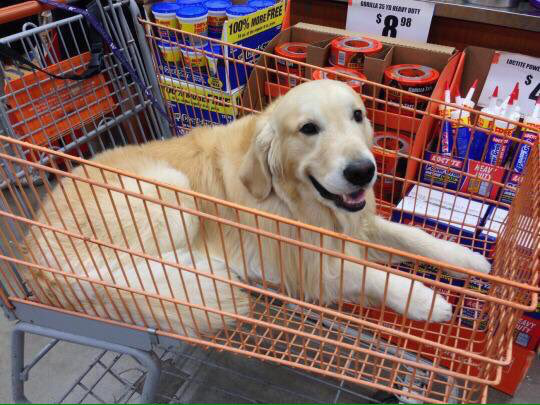

In [156]:
#Testing case where p1 & p2 are both false, but p3 is true, reveals that p3 is the correct prediction 
url="https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg"
import requests
from PIL import Image
from io import BytesIO
r = requests.get(url)
i = Image.open(BytesIO(r.content))
i

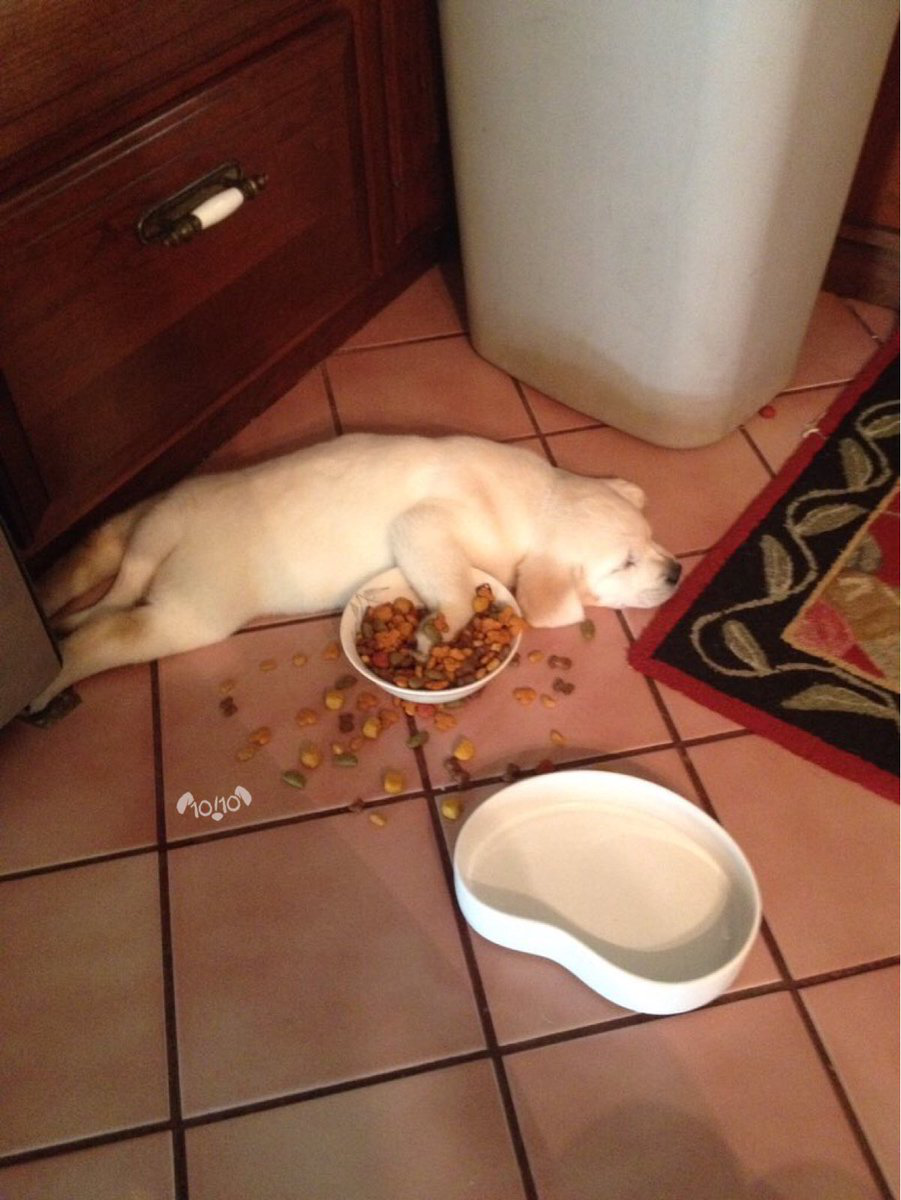

In [157]:
#2nd case where P1 , p3 are both False, while p2 is True. p2 is correct
url="https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg"
import requests
from PIL import Image
from io import BytesIO
r = requests.get(url)
i = Image.open(BytesIO(r.content))
i

In [158]:
# based on both tests, i will assume the case where all predictions are False to consider record out.
all_false_predictions=df_image_predictions[(df_image_predictions.p1_dog==False)&(df_image_predictions.p2_dog==False)&(df_image_predictions.p3_dog==False)][['jpg_url','p1_dog','p2_dog','p3_dog']]

In [159]:
all_false_predictions.shape

(324, 4)

In [160]:
#download all pictures to ensure assumption is true and hence removing the records.
folder_name = 'pictures'
import os
pictures_error_list=[]
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    try:    
        for url in all_false_predictions['jpg_url']:
            response = requests.get(url)
            with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
                file.write(response.content)
    except Exception as e:
        print(str(url)+ " _ " + str(e))
        pictures_error_list.append(tweet_id)

In [161]:
len(pictures_error_list)

0

### Manual analysis of downloaded pictures

**Based on manual analyis of the downloaded photos, most are not for dogs. prediction is correct and hence rows are better removed from dataframe**

### 3- df_tweets assessment

In [163]:
df_tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tweet_id         2331 non-null   int64         
 1   favorites        2331 non-null   int64         
 2   retweets         2331 non-null   int64         
 3   user_followers   2331 non-null   int64         
 4   user_favourites  2331 non-null   int64         
 5   date_time        2331 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 109.4 KB


In [164]:
df_tweets_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36323,7728,8769713,145944,2017-08-01 16:23:56
1,892177421306343426,31308,5721,8769713,145944,2017-08-01 00:17:27
2,891815181378084864,23583,3786,8769713,145944,2017-07-31 00:18:03
3,891689557279858688,39632,7892,8769713,145944,2017-07-30 15:58:51
4,891327558926688256,37832,8512,8769713,145944,2017-07-29 16:00:24


In [354]:
df_tweets_data['user_followers'].value_counts()

8769723    483
8769727    479
8769714    257
8769724    238
8769716    210
8769713    165
8769721    161
8769715    136
8769717     95
8769728     46
8769726     31
8769722      6
8770381      4
8770377      4
8770375      4
8770370      3
8770368      2
8770378      2
8770369      2
8770371      2
8769712      1
Name: user_followers, dtype: int64

In [355]:
df_tweets_data['user_favourites'].value_counts()

145944    2308
145945      23
Name: user_favourites, dtype: int64

## Data Assessment Results


### Data Quality

#### df_twitter_archive
1- we should not consider records for retweets (181 rows) or reply to tweets (78 rows) in the list. hence drop records where retweeted_status_id, in_reply_to_status_id have not null values

2- Four columns are used to record dog stage, since one one stage can be associated with the dog, only one column is needed instead of four. doggo, floofer, pupper, puppo columns be replaced with one column called "stage"

3- rating_denumerator has many unrealistic values, it should not exceed 10

4- rating_numerator has cases where value is bigger than 20, we will use mean for such cases

5-timestamp should be datetime instead of object (string).

6- name column has many crezy values such as very, a, the, an, O, by, my, an, unacceptable. this will be set to "None"

7- remove unwanted columns retweeted_status_user_id,retweeted_status_id, timestamp, timestamp, source,
               'in_reply_to_status_id,in_reply_to_user_id,in_reply_to_status_id, expanded_urls

#### df_image_prediction

1- remove all records where all predictions are false, not an image of a dog

2- p1, p2 and p3 should be categoral datatype, but since there is a big number of dog breeds it better keep as string.

## Data Tideness

1- merge df_twitter_archive_clean with df_tweets_data_clean

2- merge df_twitter_archive_clean with df_image_predictions, this will make df_twitter_archive_clean the master dataframe for important and related data
 


## Step 3: Data Cleaning

### Make dataframe copy

In [356]:
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweets_data_clean = df_tweets_data.copy()

## df_twitter_archive_clean dataframe Cleaning

In [357]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Define

1- we should not consider records for retweets (181 rows) or reply to tweets (78 rows) in the list. hence drop records where retweeted_status_id, in_reply_to_status_id have not null values

#### Code

In [358]:
#remove retweets first then test
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean['retweeted_status_id'].notnull()==False]

#### Test

In [359]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Code

In [360]:
# revmoew in_reply_to_status_id then test
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean['in_reply_to_status_id'].notnull()==False]

#### Test

In [361]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Define

2- Four columns are used to record dog stage, since one one stage can be associated with the dog, only one column is needed instead of four. doggo, floofer, pupper, puppo columns be replaced with one column called "stage"

#### Code

In [362]:
#https://stackoverflow.com/questions/45787782/combine-multiple-columns-in-pandas-excluding-nans

cols = ['doggo', 'floofer', 'pupper', 'puppo']
df_twitter_archive_clean["stage"] = df_twitter_archive_clean[cols].apply(lambda x: ','.join(x), axis=1)
df_twitter_archive_clean['stage'].replace('None,None,None,None','None', inplace=True)
df_twitter_archive_clean['stage'].replace('doggo,None,None,None','doggo', inplace=True)
df_twitter_archive_clean['stage'].replace('None,floofer,None,None','floofer', inplace=True)
df_twitter_archive_clean['stage'].replace('None,None,pupper,None','pupper', inplace=True)
df_twitter_archive_clean['stage'].replace('None,None,None,puppo','puppo', inplace=True)

# remove doggo, floofer,pupper, puppo columns
df_twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1,inplace=True)

In [363]:
df_twitter_archive_clean['stage'].value_counts()

None                       1761
pupper                      221
doggo                        72
puppo                        23
doggo,None,pupper,None        9
floofer                       9
doggo,floofer,None,None       1
doggo,None,None,puppo         1
Name: stage, dtype: int64

#### since we found cases for multiple stages, we will keep the latest stage reached

#### Define

2.1 leave latest stage for cases where a dog has multiples

#### Code

In [364]:
df_twitter_archive_clean['stage'].replace('doggo,None,pupper,None','pupper', inplace=True)
df_twitter_archive_clean['stage'].replace('doggo,None,None,puppo','puppo', inplace=True)
df_twitter_archive_clean['stage'].replace('doggo,floofer,None,None','floofer', inplace=True)

#### Test

In [365]:
df_twitter_archive_clean['stage'].value_counts()

None       1761
pupper      230
doggo        72
puppo        24
floofer      10
Name: stage, dtype: int64

In [366]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  stage                       2097 

#### Define

3- rating_denominator should not exceed 10, other values will be replaced by 10

#### Code

In [367]:
df_twitter_archive_clean['rating_denominator'].value_counts()

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [368]:
df_twitter_archive_clean['rating_denominator']=df_twitter_archive_clean['rating_denominator'].apply(lambda x: 10 if x!=10 else x)

In [369]:
df_twitter_archive_clean['rating_denominator'].value_counts()

10    2097
Name: rating_denominator, dtype: int64

#### Define

4- Replace values in rating_numerator by mean where values exceed 20

#### Code

In [370]:
df_twitter_archive_clean['rating_numerator'].value_counts()

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64

In [371]:
mean = int(df_twitter_archive_clean['rating_numerator'].mean())
df_twitter_archive_clean['rating_numerator']=df_twitter_archive_clean['rating_numerator'].apply(lambda x:  mean if x>20 else x)

#### Test

In [372]:
df_twitter_archive_clean['rating_numerator'].value_counts()

12    504
10    436
11    413
13    287
9     153
8      98
7      52
14     38
5      34
6      32
3      19
4      16
2       9
1       5
0       1
Name: rating_numerator, dtype: int64

#### Define

5-timestamp should be datetime instead of object (string).

#### Code

In [373]:
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean['timestamp'])

#### Test

In [374]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

In [375]:
df_twitter_archive_clean['timestamp']

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2097, dtype: datetime64[ns, UTC]

#### Define

6- name column has many crezy values such as very, a, the, an, O, by, my, an, unacceptable. this will be set to "None"

In [376]:
#Before running code: 'None' has 603 occurences
df_twitter_archive_clean['name'].value_counts()


None       603
a           55
Charlie     11
Lucy        11
Oliver      10
          ... 
Lenox        1
Ralpher      1
Fabio        1
by           1
Jazz         1
Name: name, Length: 955, dtype: int64

In [377]:
names=['very', 'a', 'the', 'an', 'O', 'by', 'my', 'an', 'unacceptable']

for name in names:
    df_twitter_archive_clean['name'].replace(name, 'None', inplace=True)

#### Test

In [378]:
#After running code: 'None' has 680 occurences
df_twitter_archive_clean['name'].value_counts()

None       680
Lucy        11
Charlie     11
Cooper      10
Oliver      10
          ... 
Tassy        1
Mosby        1
Lenox        1
Ralpher      1
Jazz         1
Name: name, Length: 947, dtype: int64

#### Define

7- remove unwanted columns in_reply_to_status_id,in_reply_to_user_id, source, text, retweeted_status_id, retweeted_status_user_id,retweeted_status_id, expanded_urls

#### Code

In [379]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

In [380]:
df_twitter_archive_clean.drop(['in_reply_to_status_id',
                               'in_reply_to_user_id', 
                               'source', 
                               'text', 
                               'retweeted_status_id', 
                               'retweeted_status_user_id',
                               'retweeted_status_timestamp', 
                               'expanded_urls'],axis=1, inplace=True)

#### Test

In [381]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   rating_numerator    2097 non-null   int64              
 3   rating_denominator  2097 non-null   int64              
 4   name                2097 non-null   object             
 5   stage               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 114.7+ KB


In [382]:
df_twitter_archive_clean.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,Franklin,None


## df_image_prediction_clean dataframe cleaning

#### Define

1- Remove all records where all three predictions are false. basically picture belong to something other than a dog.

In [383]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Code

In [384]:
df_image_predictions_clean[(df_image_predictions_clean.p1_dog==False)&(df_image_predictions_clean.p2_dog==False)&(df_image_predictions_clean.p3_dog==False)]['tweet_id'].count()

324

In [385]:
df_image_predictions_clean=df_image_predictions_clean[~((df_image_predictions_clean.p1_dog==False)&(df_image_predictions_clean.p2_dog==False)&(df_image_predictions_clean.p3_dog==False))]

In [386]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


#### Test

In [387]:
df_image_predictions_clean[(df_image_predictions_clean.p1_dog==False)&(df_image_predictions_clean.p2_dog==False)&(df_image_predictions_clean.p3_dog==False)]['tweet_id'].count()

0

In [388]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   rating_numerator    2097 non-null   int64              
 3   rating_denominator  2097 non-null   int64              
 4   name                2097 non-null   object             
 5   stage               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 114.7+ KB


In [389]:
df_tweets_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tweet_id         2331 non-null   int64         
 1   favorites        2331 non-null   int64         
 2   retweets         2331 non-null   int64         
 3   user_followers   2331 non-null   int64         
 4   user_favourites  2331 non-null   int64         
 5   date_time        2331 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 109.4 KB


In [390]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


## Step 4 - Data Tideness


1- no need for user_followers or user_favourites, data_time columns

2- forvorites and retweets columns should be merged with df_twitter_archive

3- merge df_twitter_archive with df_image_predictions. this will create master dataframe for all important data

#### Define

1- merge df_twitter_archive with df_image_predictions. this will create master dataframe for all important data

In [391]:
df_archive_master = df_twitter_archive_clean.merge(df_image_predictions_clean, on='tweet_id', how='inner')

#### Test

In [392]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   rating_numerator    2097 non-null   int64              
 3   rating_denominator  2097 non-null   int64              
 4   name                2097 non-null   object             
 5   stage               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 114.7+ KB


#### Define

2- forvorites and retweets columns should be merged with df_twitter_archive

#### Code

In [393]:
df_archive_master = df_archive_master.merge(df_tweets_data_clean, on='tweet_id', how='inner')

#### Test

In [394]:
df_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 0 to 1658
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1659 non-null   int64              
 1   timestamp           1659 non-null   datetime64[ns, UTC]
 2   rating_numerator    1659 non-null   int64              
 3   rating_denominator  1659 non-null   int64              
 4   name                1659 non-null   object             
 5   stage               1659 non-null   object             
 6   jpg_url             1659 non-null   object             
 7   img_num             1659 non-null   int64              
 8   p1                  1659 non-null   object             
 9   p1_conf             1659 non-null   float64            
 10  p1_dog              1659 non-null   bool               
 11  p2                  1659 non-null   object             
 12  p2_conf             1659 non-null 

In [395]:
df_archive_master.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers,user_favourites,date_time
0,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,...,0.090647,True,papillon,0.068957,True,31308,5721,8769713,145944,2017-08-01 00:17:27
1,891815181378084864,2017-07-31 00:18:03+00:00,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,...,0.078253,True,kelpie,0.031379,True,23583,3786,8769713,145944,2017-07-31 00:18:03
2,891689557279858688,2017-07-30 15:58:51+00:00,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,...,0.168086,True,spatula,0.040836,False,39632,7892,8769713,145944,2017-07-30 15:58:51
3,891327558926688256,2017-07-29 16:00:24+00:00,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,...,0.225770,True,German_short-haired_pointer,0.175219,True,37832,8512,8769713,145944,2017-07-29 16:00:24
4,891087950875897856,2017-07-29 00:08:17+00:00,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,...,0.116317,True,Indian_elephant,0.076902,False,19059,2850,8769713,145944,2017-07-29 00:08:17


## Repeate - Data Tideness

1- since rating_denominator is set to 10 for all records, there is no need to keep this data

2- update rating_numerator column to be rating out of 10

#### Define

1- Drop rating_denominator column

In [396]:
df_archive_master.drop('rating_denominator',axis=1, inplace=True)

#### Test

In [397]:
df_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 0 to 1658
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1659 non-null   int64              
 1   timestamp         1659 non-null   datetime64[ns, UTC]
 2   rating_numerator  1659 non-null   int64              
 3   name              1659 non-null   object             
 4   stage             1659 non-null   object             
 5   jpg_url           1659 non-null   object             
 6   img_num           1659 non-null   int64              
 7   p1                1659 non-null   object             
 8   p1_conf           1659 non-null   float64            
 9   p1_dog            1659 non-null   bool               
 10  p2                1659 non-null   object             
 11  p2_conf           1659 non-null   float64            
 12  p2_dog            1659 non-null   bool               
 13  p3 

#### Define

2- Rename rating_numerator to rating out of 10

#### Code

In [398]:
df_archive_master.rename(columns={'rating_numerator': 'rating_out_of_10'}, inplace=True)

#### Test

In [399]:
df_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 0 to 1658
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1659 non-null   int64              
 1   timestamp         1659 non-null   datetime64[ns, UTC]
 2   rating_out_of_10  1659 non-null   int64              
 3   name              1659 non-null   object             
 4   stage             1659 non-null   object             
 5   jpg_url           1659 non-null   object             
 6   img_num           1659 non-null   int64              
 7   p1                1659 non-null   object             
 8   p1_conf           1659 non-null   float64            
 9   p1_dog            1659 non-null   bool               
 10  p2                1659 non-null   object             
 11  p2_conf           1659 non-null   float64            
 12  p2_dog            1659 non-null   bool               
 13  p3 

In [400]:
df_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Visualization

In [401]:
df_archive_master.describe()

,tweet_id,rating_out_of_10,img_num,p1_conf,p2_conf,p3_conf,favorites,retweets,user_followers,user_favourites
count,1.659000e+03,1659.000000,1659.000000,1659.000000,1659.000000,1.659000e+03,1659.000000,1659.00000,1.659000e+03,1659.000000
mean,7.392510e+17,10.810729,1.214587,0.605197,0.137453,6.142101e-02,8664.582278,2523.88909,8.769727e+06,145944.009042
std,6.793112e+16,1.803122,0.574701,0.266407,0.101495,5.195868e-02,12724.464295,4585.63332,6.201621e+01,0.094685
min,6.660209e+17,0.000000,1.000000,0.044333,0.000010,2.160900e-07,72.000000,11.00000,8.769712e+06,145944.000000
25%,6.774323e+17,10.000000,1.000000,0.378397,0.054823,1.600860e-02,1969.500000,564.50000,8.769716e+06,145944.000000
50%,7.139006e+17,11.000000,1.000000,0.606654,0.121377,4.991380e-02,4044.000000,1250.00000,8.769723e+06,145944.000000
75%,7.931581e+17,12.000000,1.000000,0.852629,0.199342,9.470910e-02,10688.000000,2856.50000,8.769726e+06,145944.000000
max,8.921774e+17,14.000000,4.000000,0.999984,0.467678,2.734190e-01,156782.000000,78122.00000,8.770381e+06,145945.000000


### 1- Pie Plot for popular dog breed  **EXCLUDING None**

In [415]:
df_archive_master[df_archive_master['stage']!='None']['stage'].value_counts()

pupper     173
doggo       53
puppo       22
floofer      8
Name: stage, dtype: int64

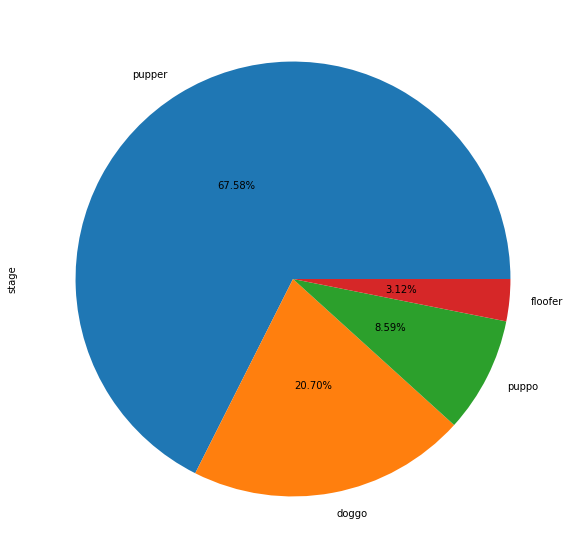

In [416]:
df_archive_master[df_archive_master['stage']!='None']['stage'].value_counts().plot.pie(figsize=(10,10), autopct='%1.2f%%', pctdistance=.5, labeldistance=1.1)

## Insight 1:
Dogs in Pupper stage of dog life cycle get most tweets.

### 2: Scatter plot between favorites vs retweets

Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

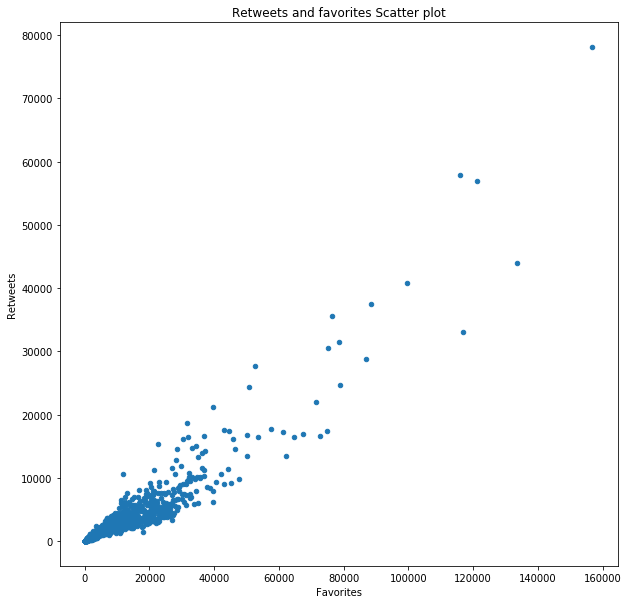

In [404]:
import matplotlib.pyplot as plt
df_archive_master.plot.scatter(x='favorites', y='retweets', figsize=(10,10))
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

In [408]:
df_archive_master['favorites'].corr(df_archive_master['retweets'])

0.9310508713822508

## Insight 2:
There is a high correlation between favorites and retweets

In [405]:
df_breeds=df_archive_master.groupby('p1').count()[['tweet_id']]
df_breeds.reset_index(inplace=True)

In [414]:
# consider breeds with counts above 20
df_breeds[df_breeds['tweet_id']>20]

,p1,tweet_id
18,Chesapeake_Bay_retriever,23
19,Chihuahua,78
27,French_bulldog,25
40,Labrador_retriever,92
53,Pembroke,88
54,Pomeranian,38
59,Samoyed,39
103,chow,41
105,cocker_spaniel,27
123,golden_retriever,137


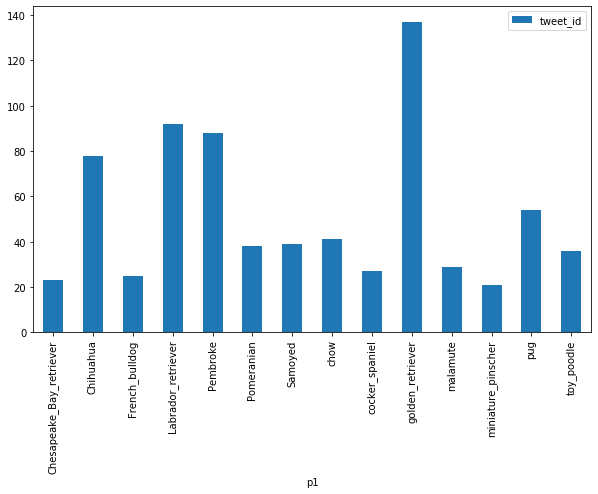

In [407]:
df_breeds[df_breeds['tweet_id']>20].plot.bar(x='p1',y='tweet_id',figsize=(10,6))

## Insight 3:
Golden retriever is the most populare dog based on predictions p1